# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "./dataSet/train.p"
validation_file="./dataSet/valid.p"
testing_file = "./dataSet/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import pandas as pd
# TODO: Number of training examples
n_train = len(y_train)

# TODO: Number of validation examples
n_validation = len(y_valid)

# TODO: Number of testing examples.
n_test = len(y_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

buffer_size = 40

def pprint(label,value):    
    print("{}".format(label)," "*(buffer_size-len(label)),'|',value)

print('-'*(buffer_size+25))
pprint(" Number of training examples ", n_train)
pprint(" Number of testing examples ", n_test)
pprint(" Image data shape ", image_shape)
pprint(" Number of classes ", n_classes)

LABELS = pd.read_csv('./signnames.csv').values
# print(Labels)

-----------------------------------------------------------------
 Number of training examples              | 34799
 Number of testing examples               | 12630
 Image data shape                         | (34799, 32, 32, 3)
 Number of classes                        | 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

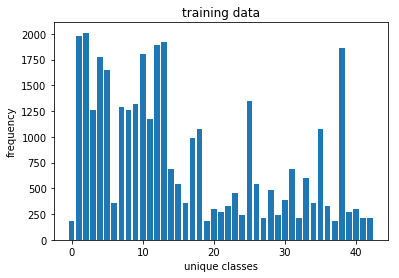

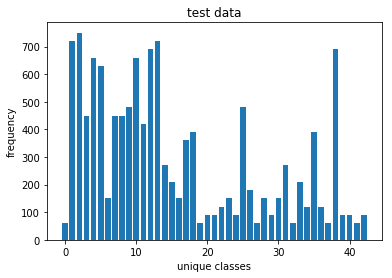

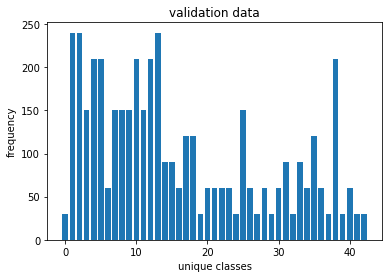

In [3]:
### Plot histogram of the dataset
import matplotlib.pyplot as plt
import numpy as np
# Visualizations will be shown in the notebook.
%matplotlib inline

def plot_histogram(data,title=''):
    n = np.unique(data)
    hist = np.zeros(len(n))
    for _data in data:
        hist[_data] +=1
    plt.bar(range(len(n)),hist)
    plt.title(title)
    plt.xlabel('unique classes')
    plt.ylabel('frequency')
    plt.show()
    
# print(y_train)
plot_histogram(y_train,'training data')
plot_histogram(y_test,'test data')
plot_histogram(y_valid,'validation data')

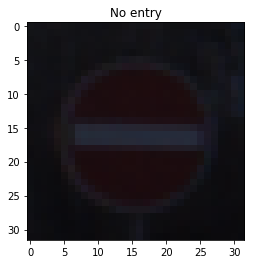

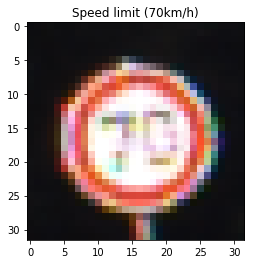

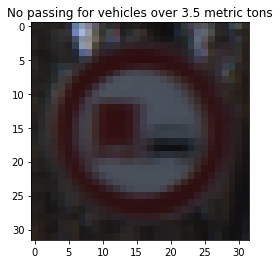

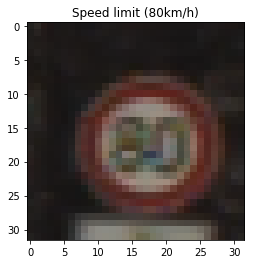

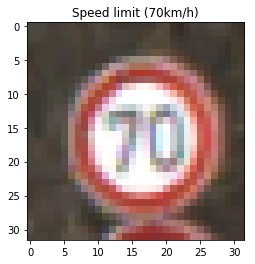

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
plt.figure()
plt.subplot()
X_train,y_train = shuffle(X_train,y_train)
for i in range(5):
#     plt.subplot(5,1,i+1)
    plt.imshow(X_train[i])
    plt.title(LABELS[y_train[i]][1])
    plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

[preprocessed image shape] (32, 32, 1)


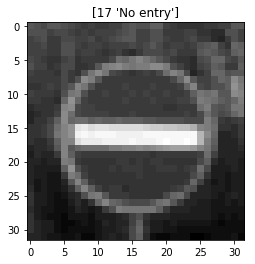

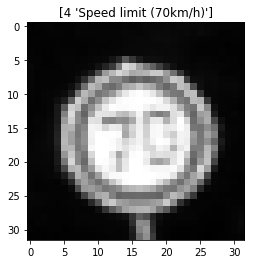

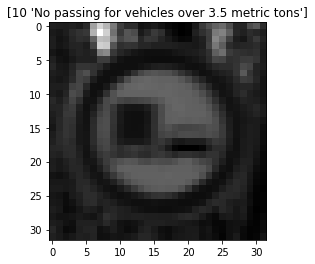

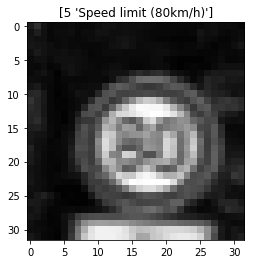

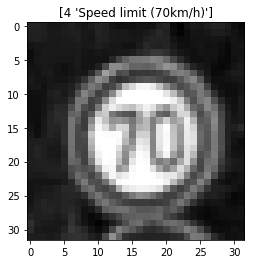

In [5]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import numpy as np
import cv2

INPUT_DIMENSION = (32,32,1)

gray_image = lambda img: cv2.cvtColor( img, cv2.COLOR_RGB2GRAY )
preprocess_image = lambda im: np.resize((gray_image(im)/255)-0.5,INPUT_DIMENSION) 

X_train = [preprocess_image(sample) for sample in X_train]
X_test = [preprocess_image(sample) for sample in X_test]
X_valid = [preprocess_image(sample) for sample in X_valid]

print("[preprocessed image shape]",X_train[0].shape)
for i in range(5):
    plt.figure()
    plt.imshow(X_train[i].squeeze(),cmap='gray')
    plt.title(LABELS[y_train[i]])
    plt.show()

### Model Architecture

In [6]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

class LeNetClassifier:
    ''' LeNet classifier '''
    def __init__(self,n_classes,learning_rate=0.001,
                 mu=0,stddev=0.1,input_dim=(32,32,1)):
        self.learning_rate = learning_rate
        self.mu = mu
        self.stddev = stddev
        self.input_dim=input_dim
        self.placeholder_dim = (None,input_dim[0],
                                input_dim[1],input_dim[2])
        self.n_classes = n_classes
        
        
        self.X = tf.placeholder(tf.float32,self.placeholder_dim)
        self.y= tf.placeholder(tf.int32,(None))
        self.y_one_hot = tf.one_hot(self.y,n_classes)
        
        self.model = self.create_model()
        self.saver = tf.train.Saver()
    
    def create_model(self):
        ''' LeNet model '''
        cnn_layer_1 = self.CNN_layer(self.X,_shape=(5,5,1,48),_strides=[1, 1, 1, 1])
        pool_1 = self.pooling_layer(cnn_layer_1,_ksize=[1,2,2,1],_stride=[1,2,2,1])
        
        
        cnn_layer_2 = self.CNN_layer(pool_1,_shape=(5,5,48,96),_strides=[1, 1, 1, 1])
        pool_2 = self.pooling_layer(cnn_layer_2,_ksize=[1,2,2,1],_stride=[1,2,2,1])
        
        
        cnn_layer_3 = self.CNN_layer(pool_2,_shape=(3,3,96,172),_strides=[1, 1, 1, 1])
        pool_3 = self.pooling_layer(cnn_layer_3,_ksize=[1,2,2,1],_stride=[1,1,1,1])
        
        flattened = self.flattened_layer(pool_3)
        
        fc_1 = self.fully_connected_layer(flattened,_shape = (688,84))
        self.logits = self.fully_connected_layer(fc_1,_shape = (84,self.n_classes), 
                                          activation=False)
        
        
        self.accuracy_check = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(self.logits,1) , tf.argmax(self.y_one_hot,1)), tf.float32))
        
        return self.adam_optimizer(self.logits)
    
    def CNN_layer(self,X,_shape=(5,5,1,6),_strides=[1, 1, 1, 1]):
        ''' convolution layer ''' 
        conv_wt = tf.Variable(tf.truncated_normal(shape=_shape,
                                                  mean=self.mu,
                                                  stddev=self.stddev))
        conv_bias = tf.Variable(tf.zeros([_shape[3]]))
        conv = tf.nn.conv2d(X,conv_wt,strides=_strides, padding = 'VALID') + conv_bias
        ''' activation ''' 
        output = tf.nn.relu(conv)
        return output
    
    def pooling_layer(self, X, _ksize=[1,2,2,1], _stride=[1,2,2,1]):
        ''' Pooling Layer '''
        pooling = tf.nn.max_pool(X, ksize=_ksize, strides=_stride, padding='VALID')
        return pooling
    
    def fully_connected_layer(self,X,_shape=(688,84),activation=True):
        ''' Fully connected layer '''
        fc_weights = tf.Variable(tf.truncated_normal(shape = _shape, 
                                                     mean = self.mu , 
                                                     stddev = self.stddev))
        fc_bias = tf.Variable(tf.zeros(_shape[1]))
        fc_layer = tf.matmul(X,fc_weights) + fc_bias
        if activation:
            return tf.nn.relu(fc_layer)
        else:
            return fc_layer
    
    def flattened_layer(self, X):
        ''' flattened layer '''
        return tf.contrib.layers.flatten(X)
        
    def adam_optimizer(self,logits):
        ''' Optimizer '''
        cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits = logits, 
                                                                labels = self.y_one_hot)
        reduced_mean = tf.reduce_mean(cross_entropy)
        optimizer = tf.train.AdamOptimizer(learning_rate = self.learning_rate)
        training_operation = optimizer.minimize(reduced_mean)
        return training_operation
        
        
    def fit(self,n_classes,epochs,batch_size,X_train,y_train,X_valid, y_valid):
        ''' train network '''
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            for epoch in range(epochs):
                X_train,y_train = shuffle(X_train,y_train)
                for b in range(0,len(X_train),batch_size):
                    X_batch,y_batch = X_train[b:b+batch_size], y_train[b:b+batch_size]
                    sess.run(self.model,feed_dict={self.X : X_batch,self.y : y_batch})
                validation_acc = self.get_accuracy(X_valid, y_valid,batch_size)
                print("[Epochs]{}  [Validation_acc]{:.3f}".format(epoch,validation_acc))
            self.save_model(sess)
        
    def get_accuracy(self,X,y,batch_size=1):
        total = len(X)
        hits=0
        sess = tf.get_default_session()
        for i in range(0,total,batch_size):
            batch_x , batch_y = X[i:i+batch_size] , y[i:i+batch_size]
            acc = sess.run(self.accuracy_check, feed_dict = {self.X : batch_x , self.y : batch_y})
            hits += (acc*len(batch_x))
        return hits/total
    
    def evaluate(self,X_train ,y_train,X_test ,y_test):
        ''' evaluate networks accuracy after training '''
        with tf.Session() as sess:
            self.saver.restore(sess, tf.train.latest_checkpoint('.'))
            accuracy_test = self.get_accuracy(X_train ,y_train)
            print ("[Trianing acc]{:.3f}".format(accuracy_test))
            accuracy_test = self.get_accuracy(X_test ,y_test)
            print ("[Test acc]{:.3f}".format(accuracy_test))
            
    def save_model(self,sess):
        self.saver.save(sess,'./traffic_classifier')
        print("[info] model saved")
    
    def predict_label(self,X,labels):
        ''' predict label of given image '''
        with tf.Session() as sess:
            self.saver.restore(sess, tf.train.latest_checkpoint('.'))
            pred_logits = sess.run(self.logits, feed_dict={self.X: X})
            pred_label = np.argmax(pred_logits, axis=1)
            for i in range(len(X)):
                print("[Prediction]{0}".format(labels[pred_label[i]]))
            return [labels[pred] for pred in pred_label ], pred_logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [7]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
EPOCHS = 15
BATCH_SIZE = 128
LEARNING_RATE=0.001

le_net = LeNetClassifier(n_classes,learning_rate=LEARNING_RATE)

le_net.fit(n_classes,EPOCHS,BATCH_SIZE,
           X_train,y_train,X_valid, y_valid)

le_net.evaluate(X_train,y_train,X_test,y_test)

INFO:tensorflow:Restoring parameters from ./traffic_classifier
[Trianing acc]0.996
[Test acc]0.935


In [8]:
import pandas as pd

X_valid,y_valid = shuffle(X_valid,y_valid)
print()
result, proba = le_net.predict_label(X_valid[0:5],LABELS)
correct_labels = [LABELS[y] for y in y_valid[0:5]]
print()
for label in correct_labels:
    print("[actual]",label[1])


INFO:tensorflow:Restoring parameters from ./traffic_classifier
[Prediction][32 'End of all speed and passing limits']
[Prediction][5 'Speed limit (80km/h)']
[Prediction][25 'Road work']
[Prediction][15 'No vehicles']
[Prediction][2 'Speed limit (50km/h)']

[actual] End of all speed and passing limits
[actual] Speed limit (80km/h)
[actual] Road work
[actual] No vehicles
[actual] Speed limit (50km/h)


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [9]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
TEST_DIR = './test_images'
test_input = []
test_labels = []
for test_file in os.listdir(TEST_DIR):
    print("[loading]",LABELS[int(test_file.split('.')[0])][1])
    test_input.append(cv2.resize( cv2.imread(os.path.join(TEST_DIR,test_file)) , (32,32)))
    test_labels.append(LABELS[int(test_file.split('.')[0])][1])

[loading] Right-of-way at the next intersection
[loading] Stop
[loading] Yield
[loading] Speed limit (70km/h)
[loading] Speed limit (30km/h)


### Predict the Sign Type for Each Image

INFO:tensorflow:Restoring parameters from ./traffic_classifier
[Prediction][11 'Right-of-way at the next intersection']
[Prediction][14 'Stop']
[Prediction][13 'Yield']
[Prediction][4 'Speed limit (70km/h)']
[Prediction][2 'Speed limit (50km/h)']


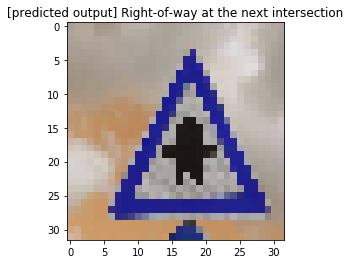

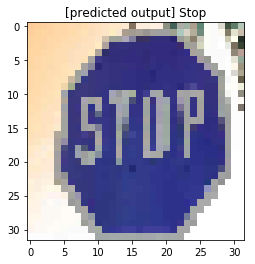

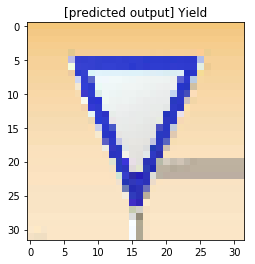

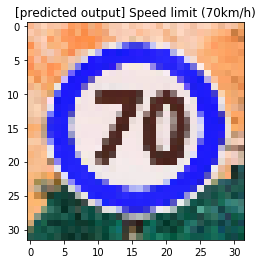

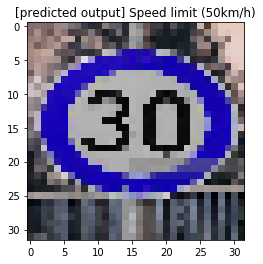

In [10]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
X_test_new = [preprocess_image(sample) for sample in test_input]
result, proba = le_net.predict_label(X_test_new,LABELS)
# print(result)
for i,img in enumerate(test_input):
#     plt.subplot(len(test_input),1,i+1)
    plt.imshow(img)
    plt.title("[predicted output] {}".format(result[i][1]))
    plt.show()

### Analyze Performance

In [11]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
hits = 0
BUFF_SIZE = 60
print('predicted',' '*(int(BUFF_SIZE/2)-len('predicted')),'|','actual' )
print('-'*80)
for idx,res in enumerate(result):
    if res[1] == test_labels[idx]: hits +=1
    print(res[1],' '*(int(BUFF_SIZE/2)-len(res[1])),'|',test_labels[idx])
print('-'*80)
print('[accuracy] {}'.format(hits/len(result)))

predicted                       | actual
--------------------------------------------------------------------------------
Right-of-way at the next intersection  | Right-of-way at the next intersection
Stop                            | Stop
Yield                           | Yield
Speed limit (70km/h)            | Speed limit (70km/h)
Speed limit (50km/h)            | Speed limit (30km/h)
--------------------------------------------------------------------------------
[accuracy] 0.8


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

actual Right-of-way at the next intersection
--------------------------------------------------------------------------------
Right-of-way at the next intersection                         | 1.0
Pedestrians                                                   | 3.2227e-15
Double curve                                                  | 4.55075e-17
Roundabout mandatory                                          | 1.11581e-17
Go straight or left                                           | 5.25451e-18


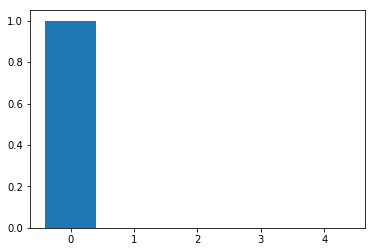


actual Stop
--------------------------------------------------------------------------------
Stop                                                          | 0.999995
Turn left ahead                                               | 1.9348e-06
Go straight or left                                           | 1.20174e-06
Keep left                                                     | 9.13656e-07
Turn right ahead                                              | 2.61988e-07


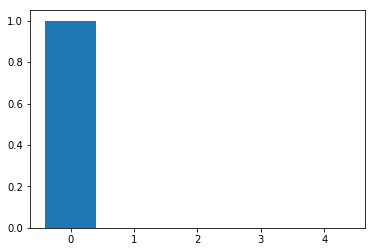


actual Yield
--------------------------------------------------------------------------------
Yield                                                         | 1.0
Speed limit (30km/h)                                          | 5.39172e-31
Speed limit (50km/h)                                          | 6.28297e-34
End of no passing by vehicles over 3.5 metric tons            | 4.54861e-34
Ahead only                                                    | 2.21658e-34


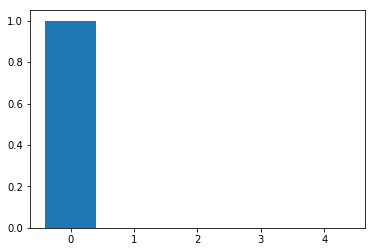


actual Speed limit (70km/h)
--------------------------------------------------------------------------------
Speed limit (70km/h)                                          | 0.999917
Speed limit (20km/h)                                          | 8.32727e-05
Keep left                                                     | 1.60437e-07
Speed limit (30km/h)                                          | 4.06573e-10
Speed limit (80km/h)                                          | 2.2947e-14


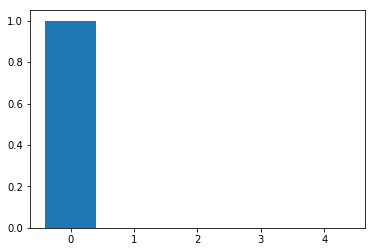


actual Speed limit (30km/h)
--------------------------------------------------------------------------------
Speed limit (50km/h)                                          | 0.90177
Speed limit (30km/h)                                          | 0.0982267
Keep right                                                    | 3.6065e-06
Speed limit (20km/h)                                          | 4.38543e-08
Go straight or left                                           | 1.30004e-09


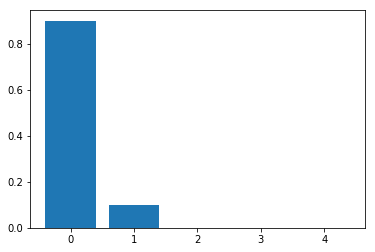

In [12]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    out = sess.run(tf.nn.top_k(tf.nn.softmax(proba), k=5))

BUFF_SIZE = 60
for i in range(len(out[0])):
    print('actual',test_labels[i])
    print('-'*(BUFF_SIZE+20))
    for j in range(len(out[0][i])):
        label = LABELS[out[1][i][j]][1]
        prob = out[0][i][j]
        print(label,' '*(BUFF_SIZE-len(label)),'|',prob)
    plt.bar(range(len(out[0][i])),out[0][i].tolist())
    plt.show()
    print()



### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.